# #DuBoisChallenge2024 Challenge 02

To do:

1. Load data
2. Test visualisation
3. Final visualisation

But first, we load the required packages and of course Du Bois's colour palette.

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
from colors import dubois_colors
%matplotlib notebook

## 1. Load the data

The first step is easy, loading the challenge data into a dataframe.

In [269]:
df = pd.read_csv('2024/challenge02/data.csv')
df.head(3)

,Year,Slave,Free
0,1790,98.7,1.3
1,1800,98.3,1.7
2,1810,98.3,1.7


And for reference, we print the Du Bois colours:

In [270]:
dubois_colors

{'black': '#000000',
 'brown': '#654321',
 'tan': '#d2b48c',
 'gold': '#ffd700',
 'pink': '#ffc0cb',
 'crimson': '#dc143c',
 'green': '#00aa00',
 'blue': '#4682b4',
 'purple': '#7e6583',
 'bg': '#FAF0E6'}

We will use black, crimson, bg and white for this project. But first, we need to make a test plot.

## 2. Test Visualisation

Let's see if we can recreate Du Bois's Plate 12 on a functional level.

<IPython.core.display.Javascript object>


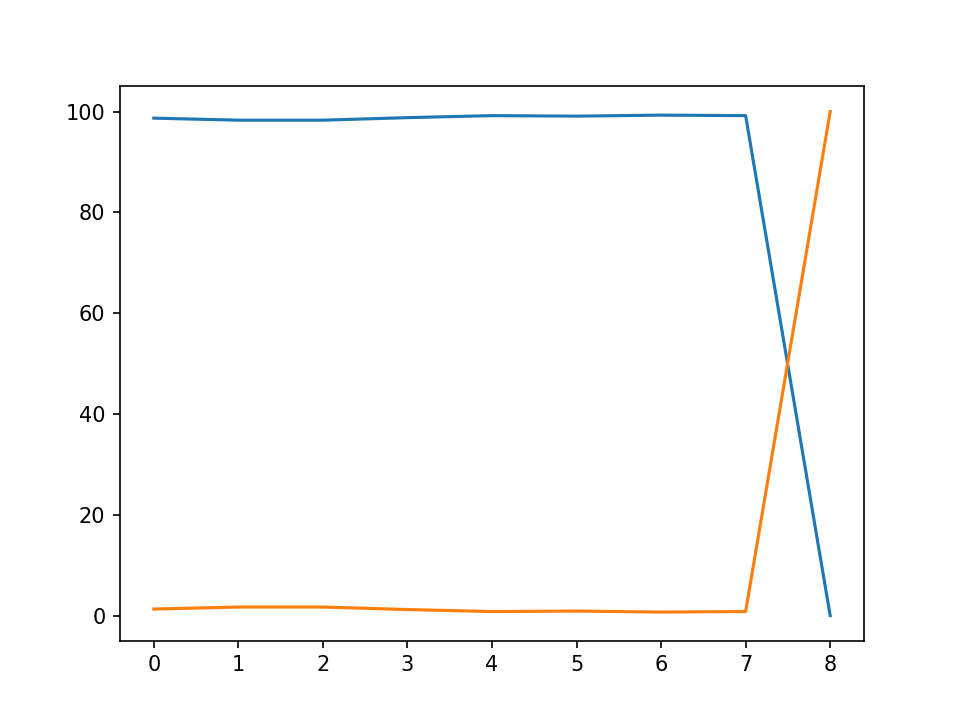

In [271]:
fig, ax = plt.subplots()
ax.plot(df['Slave'])
ax.plot(df['Free'])

Alright, this is not wat we want. We want a filled and stacked area chart. 

<IPython.core.display.Javascript object>


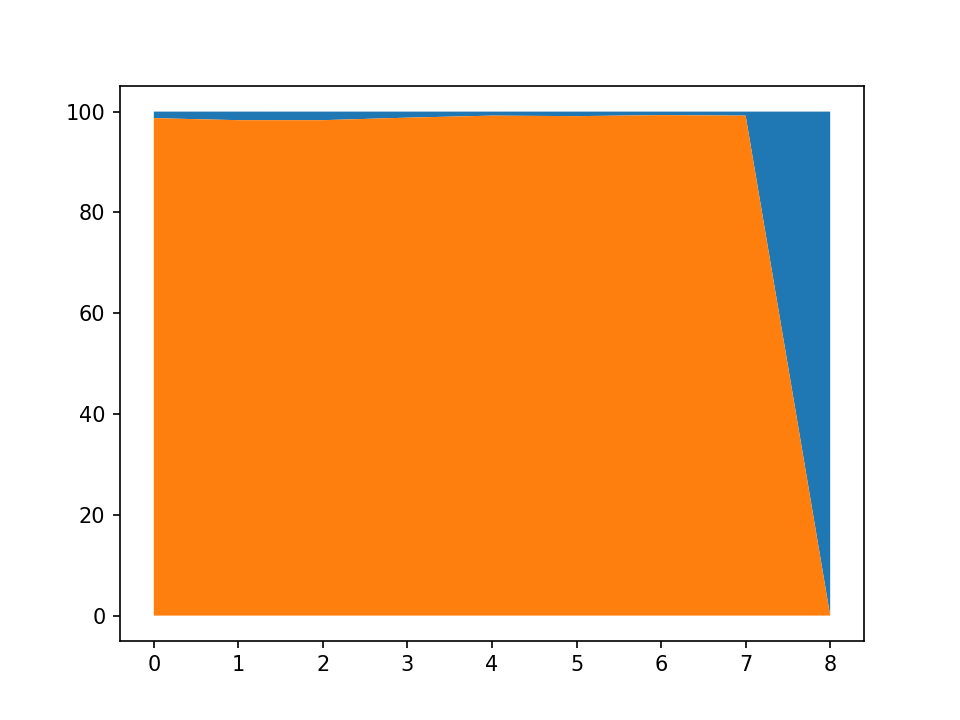

In [272]:
df['Total'] = df['Slave'] + df['Free']

fig, ax = plt.subplots()
ax.fill_between(df.index.values, df['Slave'], df['Total'])
ax.fill_between(df.index.values, 0, df['Slave'])

Nice. Technically, we are done. But we need to do some extra work if we are to celebrate Du Bois's style.

Before we get to the true styling part, we'll implement a few tweaks:

- Vertical orientation
- Limit axis range to 0-3%

Let's change the plot orientation.

<IPython.core.display.Javascript object>


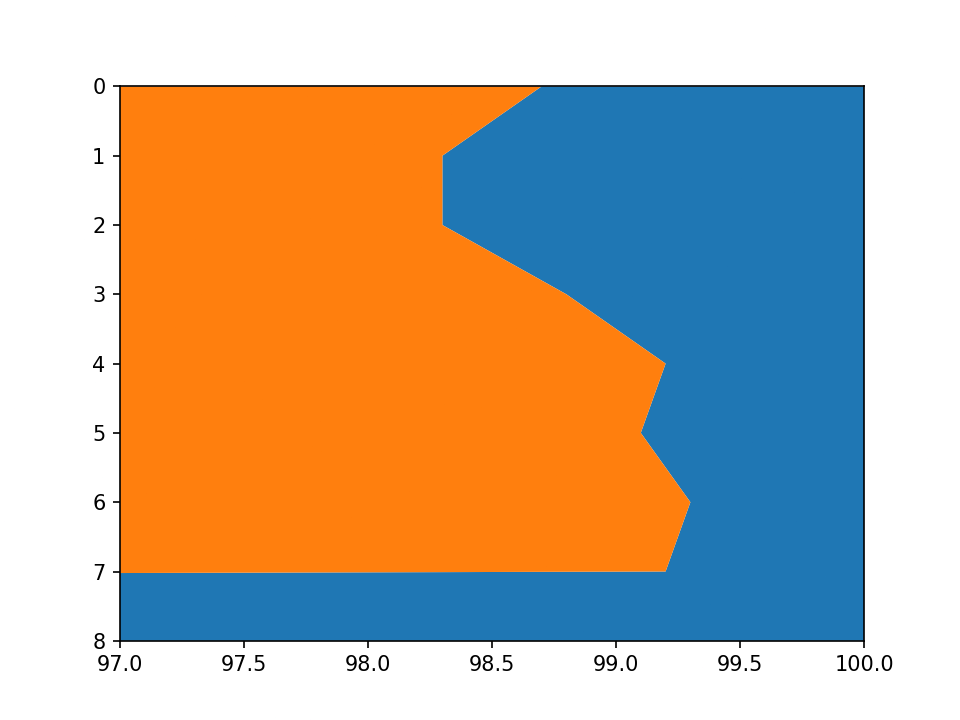

(8.0, 0.0)

In [273]:
fig, ax = plt.subplots()
ax.fill_betweenx(df.index.values, df['Slave'], df['Total'])
ax.fill_betweenx(df.index.values, 0, df['Slave'])
ax.set_xlim([97,100])
ax.set_ylim([8,0])

## 3. Final visualisation

Let's add some nice coours to the design. First, we're changing the colours.

<IPython.core.display.Javascript object>


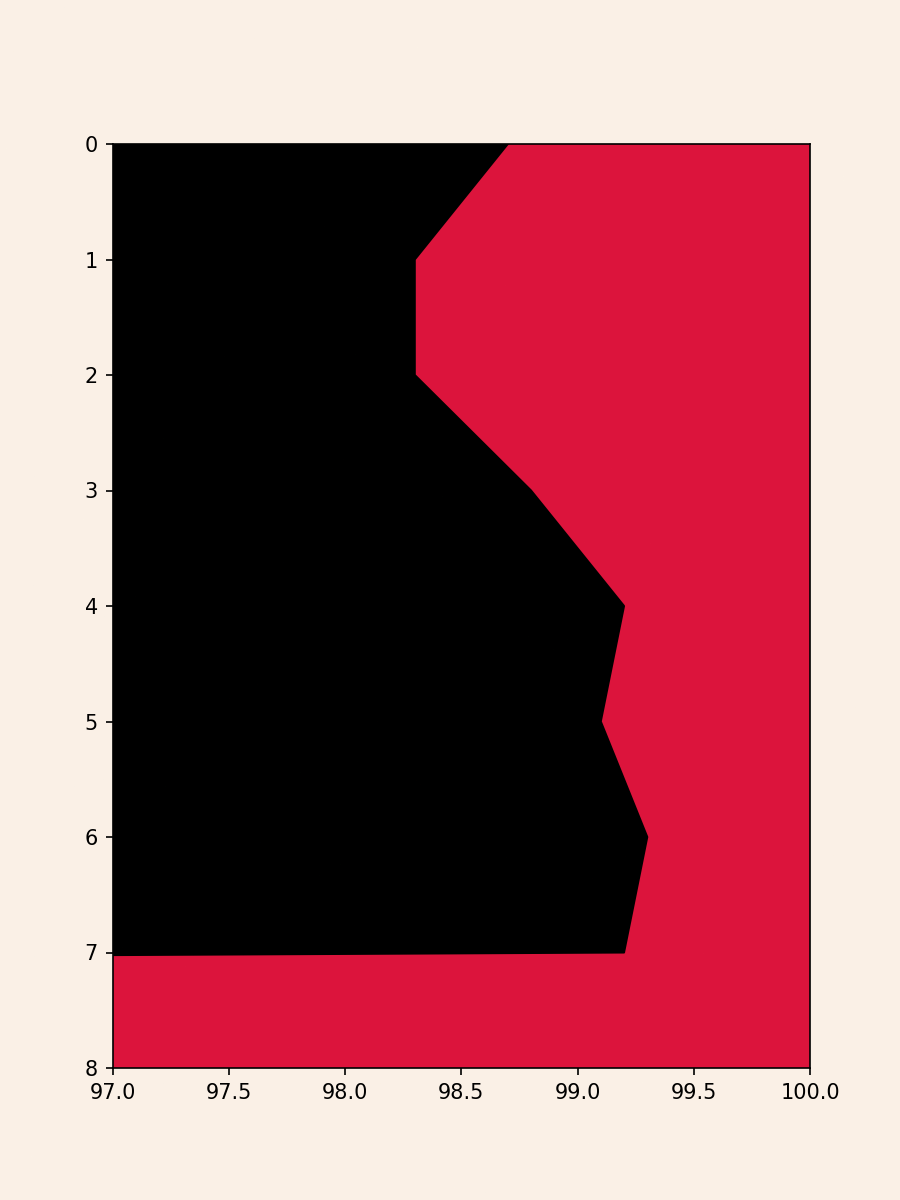

(8.0, 0.0)

In [274]:
fig, ax = plt.subplots(
    figsize=(6,8),        
    facecolor=dubois_colors['bg']
)

ax.fill_betweenx(df.index.values, df['Slave'], df['Total'], color=dubois_colors['crimson'])
ax.fill_betweenx(df.index.values, 0, df['Slave'], color=dubois_colors['black'])

ax.set_xlim([97,100])
# flip orientation from top to bottom using y limits
ax.set_ylim([8,0])

We then spend add some modifications to the x tick marks:

<IPython.core.display.Javascript object>


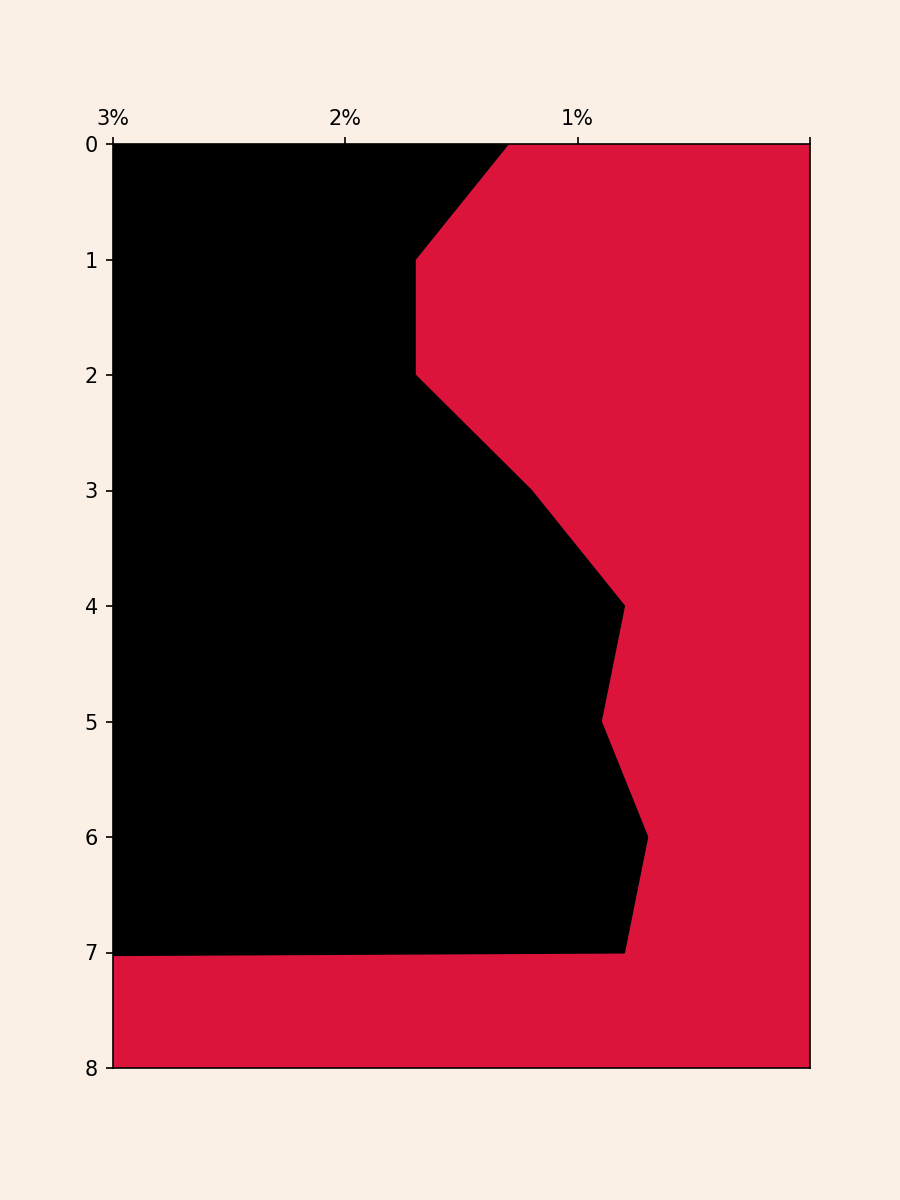

(8.0, 0.0)

In [275]:
fig, ax = plt.subplots(
    figsize=(6,8),        
    facecolor=dubois_colors['bg']
)

ax.fill_betweenx(df.index.values, df['Slave'], df['Total'], color=dubois_colors['crimson'])
ax.fill_betweenx(df.index.values, 0, df['Slave'], color=dubois_colors['black'])

# modify x ticks
ax.set_xticks([97, 98, 99, 100], ['3%', '2%', '1%',  ''])
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

ax.set_xlim([97,100])
ax.set_ylim([8,0])

We now do the same for the y ticks. We need to apply some extra work to mimic the use of % at only the first and last of the labels: 

<IPython.core.display.Javascript object>


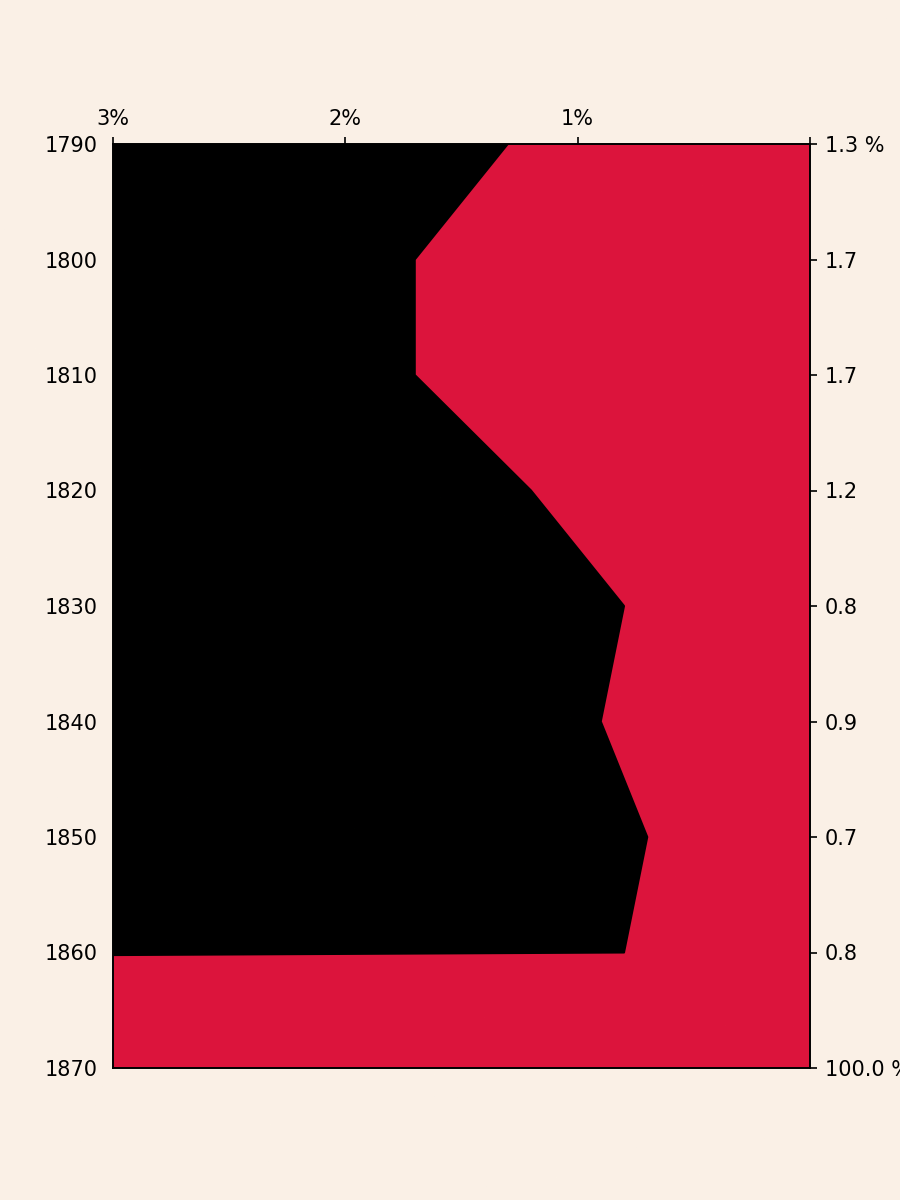

(8.0, 0.0)

In [276]:
fig, ax = plt.subplots(
    figsize=(6,8),        
    facecolor=dubois_colors['bg']
)

ax.fill_betweenx(df.index.values, df['Slave'], df['Total'], color=dubois_colors['crimson'])
ax.fill_betweenx(df.index.values, 0, df['Slave'], color=dubois_colors['black'])

# modify x ticks
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xticks([97, 98, 99, 100], ['3%', '2%', '1%',  ''])

# modify y ticks
y_tick_values = df.index.values
ax.set_yticks(y_tick_values, df['Year'])
y2 = ax.twinx()

# custom handling of y2 axis labels
y2_labels = []
for index, value in enumerate(df['Free']):
    tick = str(value)
    if index == 0 or index == len(df['Free'])-1:
        tick += ' %'
    y2_labels.append(tick)
y2.set_yticks(y_tick_values, y2_labels)

ax.tick_params(left=False, right=False,)

ax.set_xlim([97,100])
ax.set_ylim([8,0])
y2.set_ylim([8,0])

There are two more things we need to add to the plot. First, the white horizontal grid lines. 

<IPython.core.display.Javascript object>


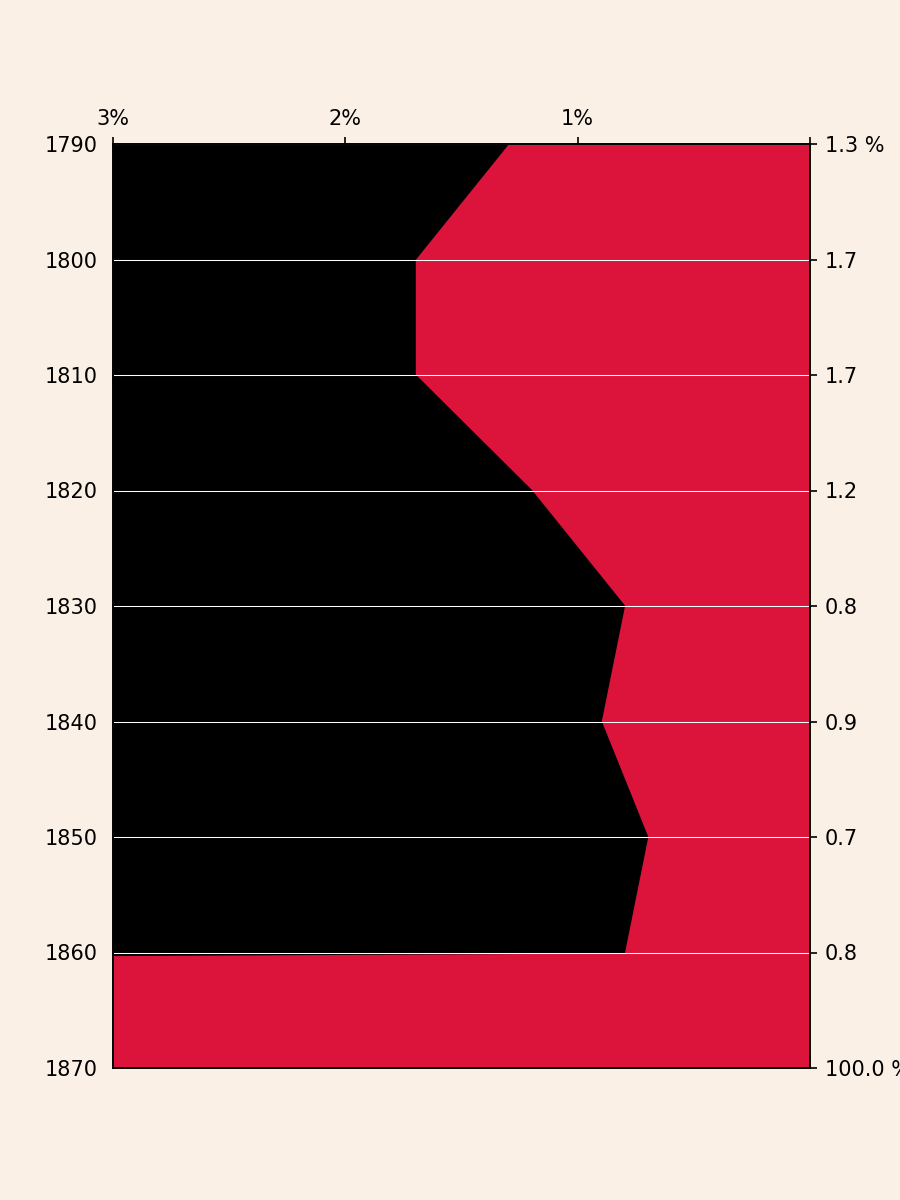

(8.0, 0.0)

In [277]:
fig, ax = plt.subplots(
    figsize=(6,8),        
    facecolor=dubois_colors['bg']
)

ax.fill_betweenx(df.index.values, df['Slave'], df['Total'], color=dubois_colors['crimson'])
ax.fill_betweenx(df.index.values, 0, df['Slave'], color=dubois_colors['black'])

# modify x ticks
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xticks([97, 98, 99, 100], ['3%', '2%', '1%',  ''])

# modify y ticks
y_tick_values = df.index.values
ax.set_yticks(y_tick_values, df['Year'])
y2 = ax.twinx()

# custom handling of y2 axis labels
y2_labels = []
for index, value in enumerate(df['Free']):
    tick = str(value)
    if index == 0 or index == len(df['Free'])-1:
        tick += ' %'
    y2_labels.append(tick)
y2.set_yticks(y_tick_values, y2_labels)

ax.tick_params(left=False, right=False,)

# add grid
ax.grid(color='white', linestyle='-', linewidth=.5, axis='y')

ax.set_xlim([97,100])
ax.set_ylim([8,0])
y2.set_ylim([8,0])

And now onto the tricky part. There is a ripped paper effect in the left side of the chart. I'm going to try and recreate that using a random data set. I play around a bit with the next cell to see what kind of values make the effect look okay. I also make sure to set the first valueto 0.

In [278]:
import random
paper = []
paper_indexes = []

for value in range(0, 800):
    paper_indexes.append(value/100)
    if value == 0:
        paper.append(0)
        continue
    paper.append(97+(random.random()/20))
len(paper)

800

We now use that random data to plot an area chart on the left.

<IPython.core.display.Javascript object>


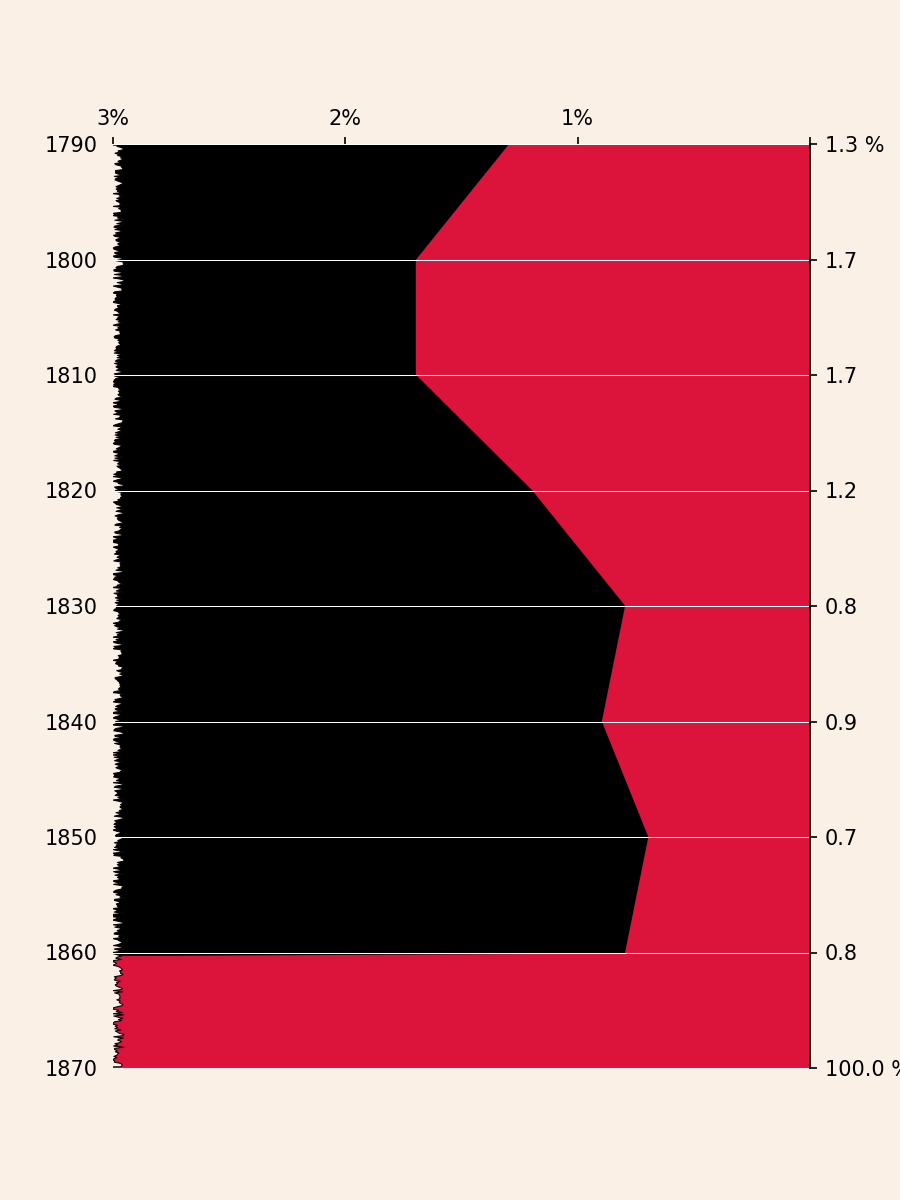

In [281]:
fig, ax = plt.subplots(
    figsize=(6,8),        
    facecolor=dubois_colors['bg'],
)

ax.fill_betweenx(df.index.values, df['Slave'], df['Total'], color=dubois_colors['crimson'])
ax.fill_betweenx(df.index.values, 0, df['Slave'], color=dubois_colors['black'])

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xticks([97, 98, 99, 100], ['3%', '2%', '1%',  ''])

y_tick_values = df.index.values
ax.set_yticks(y_tick_values, df['Year'])
y2 = ax.twinx()

# custom handling of y2 axis labels
y2_labels = []
for index, value in enumerate(df['Free']):
    tick = str(value)
    if index == 0 or index == len(df['Free'])-1:
        tick += ' %'
    y2_labels.append(tick)
y2.set_yticks(y_tick_values, y2_labels)

ax.tick_params(left=False, right=False,)

ax.grid(color='white', linestyle='-', linewidth=.5, axis='y')

# add random ripped paper line here
ax.fill_betweenx(paper_indexes, 96.9, paper, facecolor=dubois_colors['bg'], edgecolor=dubois_colors['black'], lw=.5)


ax.set_xlim([97,100])
ax.set_ylim([8,0])
y2.set_ylim([8,0])

ax.spines[['left', 'top', 'bottom']].set_visible(False)
y2.spines[['left', 'top', 'bottom']].set_visible(False)

Now it's time for the finishing touches:

- changing the fonts
- adding a title
- adding a y-axis label
- padding the y-axis data labels
- giving this graph some breathing room
- adding a white plot line for the values (as the original this as well).

Here we go:

<IPython.core.display.Javascript object>


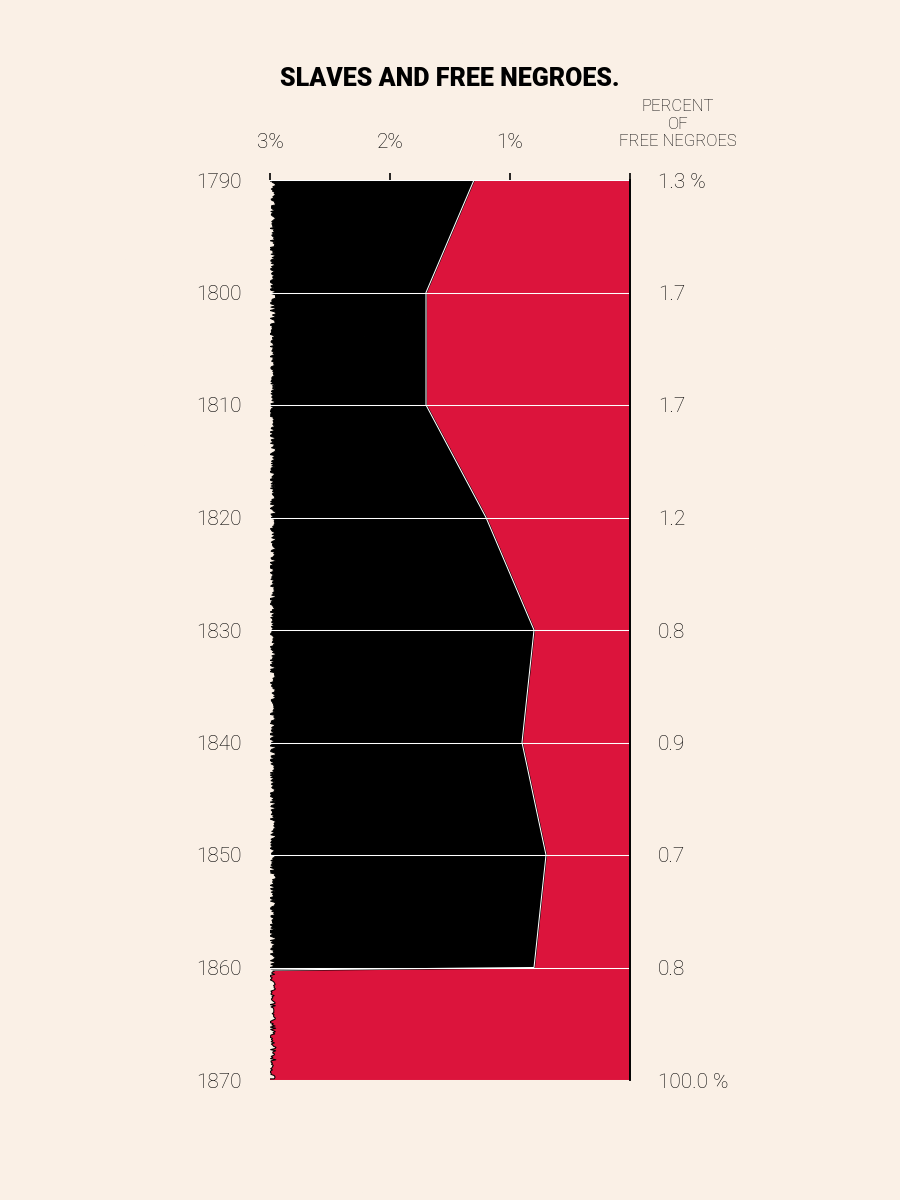

In [285]:
fig, ax = plt.subplots(
    figsize=(6,8),        
    facecolor=dubois_colors['bg'],
)

# loading fonts
rob_font_heavy = {'fontname':'Roboto', 'fontweight': 'black',}
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light',}

ax.fill_betweenx(df.index.values, df['Slave'], df['Total'], color=dubois_colors['crimson'])
ax.fill_betweenx(df.index.values, 0, df['Slave'], color=dubois_colors['black'])

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
# use font here
ax.set_xticks([97, 98, 99, 100], ['3%', '2%', '1%',  ''],  **rob_font_light)

y_tick_values = df.index.values
# use font here
ax.set_yticks(y_tick_values, df['Year'], **rob_font_light)
y2 = ax.twinx()

# custom handling of y2 axis labels
y2_labels = []
for index, value in enumerate(df['Free']):
    tick = str(value)
    if index == 0 or index == len(df['Free'])-1:
        tick += ' %'
    y2_labels.append(tick)
# use font
y2.set_yticks(y_tick_values, y2_labels, **rob_font_light)

# padding y ticks
ax.tick_params(left=False, right=False, pad=10)
y2.tick_params(left=False, right=False, pad=10)

ax.grid(color='white', linestyle='-', linewidth=.5, axis='y')
ax.fill_betweenx(paper_indexes, 96.9, paper, facecolor=dubois_colors['bg'], edgecolor=dubois_colors['black'], lw=.5)


ax.set_xlim([97,100])
ax.set_ylim([8,0])
y2.set_ylim([8,0])

ax.spines[['left', 'top', 'bottom']].set_visible(False)
y2.spines[['left', 'top', 'bottom']].set_visible(False)

# plot white data line
ax.plot(df['Slave'], df.index.values, c='white', lw=.5)

# add right y-axis label use font here
plt.text(100.4, -.3, 'PERCENT\nOF\nFREE NEGROES', ha='center', fontsize=8, **rob_font_light)
# use title font here
plt.title('SLAVES AND FREE NEGROES.', pad=45, **rob_font_heavy)
# add plot margins
plt.subplots_adjust(top=0.85, bottom=.1, left=.3, right=.7)
plt.show()

And that is it.

Thank you for reading!

---

And a special thanks to Hossein on Stack Overflow (https://stackoverflow.com/questions/61128143/plots-not-showing-in-jupyter-notebook). I nearly lost it when my margins did not work. `%matplotlib notebook` saved me!